Multiple Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
student=pd.read_csv("std_marks_data.csv")

In [4]:
student

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     288 non-null    float64
 1   age       300 non-null    int64  
 2   internet  300 non-null    int64  
 3   marks     300 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [6]:
student.head()

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34


In [7]:
student.isna().sum()

hours       12
age          0
internet     0
marks        0
dtype: int64

In [8]:
student.hours=student.hours.fillna(student.hours.mean())

In [9]:
student.isna().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

In [10]:
student.head()

,hours,age,internet,marks
0,6.840000,15,0,78.64
1,6.560000,20,1,88.80
2,5.494514,21,1,88.90
3,8.670000,22,1,98.99
4,7.550000,17,1,92.34


In [11]:
X =student.iloc[:,:-1]
y=student.iloc[:,-1]
y
X

,hours,age,internet
0,6.840000,15,0
1,6.560000,20,1
2,5.494514,21,1
3,8.670000,22,1
4,7.550000,17,1
...,...,...,...
295,2.990000,25,0
296,6.550000,15,1
297,0.000000,20,1
298,9.900000,22,0


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
coefficients = model.coef_
intercept = model.intercept_

print("\nModel Parameters:")
print(f"Coefficients (hours, age, internet): {coefficients}")
print(f"Intercept: {intercept:.2f}")


Model Parameters:
Coefficients (hours, age, internet): [1.29475861 0.17277639 4.1527848 ]
Intercept: 60.03


In [16]:
# Calculate R² score (accuracy)
r_squared = model.score(X, y)
print(f"\nCoefficient of Determination (R²): {r_squared:.4f}")


Coefficient of Determination (R²): 0.0431


In [2]:
hours=int(input("Enter hours"))

age=int(input("Enter age"))
internet=int(input("Enter internet usage (1 for yes, 0 for no)"))
print(hours, age, internet)
data=[[hours ,age, internet]]
print(model.predict(data))

10 1 1


NameError: name 'model' is not defined

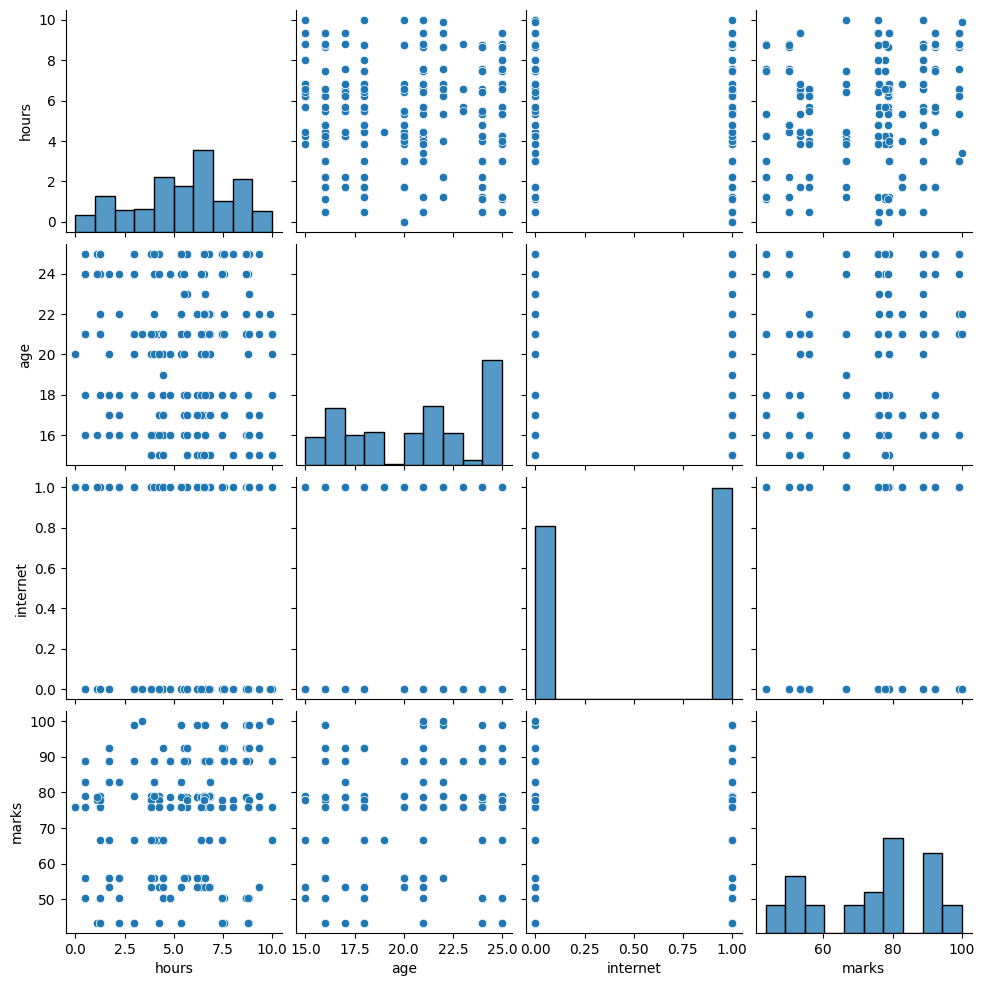

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.fit(X_test,y_test)
# Predictions
y_pred = model.predict(X_test)

# Pairplot to show variable relationships
sns.pairplot(student)
plt.show()


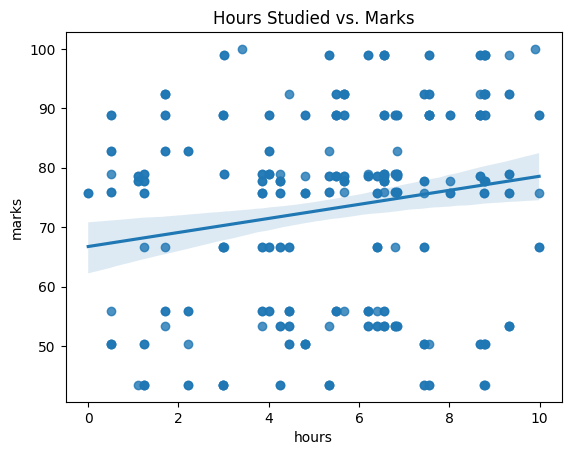

In [ ]:
sns.regplot(x=student['hours'], y=student['marks'])
plt.title("Hours Studied vs. Marks")
plt.show()

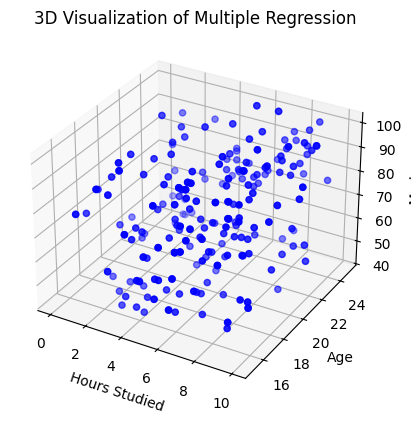

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(student['hours'], student['age'], student['marks'], c='blue', marker='o')
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Age")
ax.set_zlabel("Marks")
plt.title("3D Visualization of Multiple Regression")
plt.show()
